Εδώ κάνω τις μετατροπές των δεδομένων που εχουν επιλεχθεί μετά από μελέτη του dataset και αποθήκεύση με διορθωμενες τιμες, μετατροπες των στηλων, αφαιρεση των επιλεμενων μεταβλητών και όλα τα κενά (προκύπτει το data2_droplists.csv)

In [248]:
import numpy as np
import pandas as pd

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
%matplotlib inline

In [251]:
sns.set_style('darkgrid')

In [252]:
pd.options.display.float_format = '{:,.2f}'.format 

In [253]:
#loading unprocessed dataset
data = pd.read_csv('data.csv')

In [254]:
data.shape

(1848, 749)

#### ΕΛΕΓΧΟΣ ΕΠΙΤΡΕΠΤΩΝ ΤΙΜΩΝ

In [ ]:
#### μετατροπη 'HEIGHT', 'WEIGHT' , 'WAISTCIRCUMFERENCE' σε επιτρεπτες τιμες(έλεγχος απ'το excel ποιές είναι)

In [255]:
data['HEIGHT'].isnull().values.sum()

0

In [256]:
#mean to nan
data['HEIGHT']= np.where(np.isclose(data['HEIGHT'].values, data['HEIGHT'].mean()), np.nan, data['HEIGHT'].values)
data['WEIGHT']= np.where(np.isclose(data['WEIGHT'].values, data['WEIGHT'].mean()), np.nan, data['WEIGHT'].values)
data['WAISTCIRCUMFERENCE']= np.where(np.isclose(data['WAISTCIRCUMFERENCE'].values, data['WAISTCIRCUMFERENCE'].mean()),
                                     np.nan, data['WAISTCIRCUMFERENCE'].values)

In [257]:
data['HEIGHT']= np.where(data['HEIGHT']<105, np.nan, data['HEIGHT'].values)
data['WEIGHT']= np.where(data['WEIGHT']<42, np.nan, data['WEIGHT'].values)
data['WAISTCIRCUMFERENCE']= np.where(data['WAISTCIRCUMFERENCE']>160, np.nan, data['WAISTCIRCUMFERENCE'].values)
data['WAISTCIRCUMFERENCE']= np.where(data['WAISTCIRCUMFERENCE']<53, np.nan, data['WAISTCIRCUMFERENCE'].values)

In [258]:
data['HEIGHT'].isnull().values.sum()

138

#### έλεγχος ότι η μεταβλητή 'hAPAQ10',  ώρες ύπνου/μέρα, είναι σε επιτρεπτές τιμές >1h & <24h

In [259]:
data['hAPAQ10'].isnull().values.sum()

0

In [260]:
data['hAPAQ10']= np.where(np.isclose(data['hAPAQ10'].values, data['hAPAQ10'].mean()), np.nan, data['hAPAQ10'].values)
data['hAPAQ10']= np.where(data['hAPAQ10']<2, np.nan, data['hAPAQ10'].values)
data['hAPAQ10']= np.where(data['hAPAQ10']>24, np.nan, data['hAPAQ10'].values) 

In [261]:
data['hAPAQ10'].isnull().values.sum()

259

#### L20-Systolic, L21-Diastolic Blood Pressure Numbers 

In [262]:
data[['L20', 'L21']].apply(pd.Series.value_counts)

,L20,L21
1.30,1.00,nan
8.00,nan,1.00
12.00,1.00,nan
12.50,1.00,nan
46.00,nan,1.00
...,...,...
196.00,2.00,nan
200.00,2.00,nan
202.00,1.00,nan
230.00,1.00,nan


In [263]:
data['L20']= np.where(data['L20']<60, np.nan, data['L20'].values)
data['L21']= np.where(data['L21']<30, np.nan, data['L21'].values)

#### ΜΕΤΑΤΡΟΠΕΣ

##### Σε οσες στήλες γίνονται μετατροπές αλλάζει το mean σε nan για να μη χαθούν οι τιμές που λείπουν (γτ το mean θα αλλαξει ως μετά τις αλλαγες)

In [264]:
#στη στηλη αυτη ειναι τα m που μπορει να περπατησει χωρις ξεκουραση, αλλα ειναι αντιστροφα.Θελει απο 0->6 αυξουσα για να
# την ιεραρχια, ενω εδω ειναι φθινουσα, δλδ το 6 ειναι το 1m, και το 0 ειναι >1000m συνφωνα με το maelstrom
data['F24'].value_counts()

0.00    1453
3.00     114
1.00     111
2.00      92
4.00      48
5.00      22
0.52       5
6.00       3
Name: F24, dtype: int64

In [265]:
data['F24'] = data['F24'].replace([0,1,2,3,4,5,6],[6,5,4,3,2,1,0])

In [266]:
data['F24'].value_counts()

6.00    1453
3.00     114
5.00     111
4.00      92
2.00      48
1.00      22
0.52       5
0.00       3
Name: F24, dtype: int64

#### μεταροπη nan των F29-F33 σε 0 για να ταιριαζουν με το F26=0 που ειναι η μη απωλεια μνημης

In [267]:
#find values for each colunm
data[['F29', 'F30','F31','F33']].apply(pd.Series.value_counts)

,F29,F30,F31,F33
0.00,627.00,458.00,395.00,20.00
0.10,"1,154.00",nan,nan,nan
0.35,nan,"1,152.00",nan,nan
0.43,nan,nan,"1,155.00",nan
1.00,67.00,231.00,298.00,33.00
2.00,nan,7.00,nan,1.00
3.00,nan,nan,nan,12.00
3.87,nan,nan,nan,347.00
4.00,nan,nan,nan,"1,435.00"


In [268]:
data['F29']= np.where(np.isclose(data['F29'].values, data['F29'].mean()), np.nan, data['F29'].values)
data['F30']= np.where(np.isclose(data['F30'].values, data['F30'].mean()), np.nan, data['F30'].values)
data['F31']= np.where(np.isclose(data['F31'].values, data['F31'].mean()), np.nan, data['F31'].values)
data['F33']= np.where(np.isclose(data['F33'].values, data['F33'].mean()), np.nan, data['F33'].values)

In [269]:
#αλλαζω F29->F33 για να ταιριαζουν με το F26=0 και να υπαρχει ιεραρχεια. Η F32 γινεται drop και μπαινει ως τιμη 0 στο F33
#τα δοκιμασα και δεν χρειαζεται να τα κανω σε 2 βηματα, το κανει ο αλγοριθμος!
data['F29'] = data['F29'].replace([1,0],[2,1])
data['F30'] = data['F30'].replace([0,1,2],[1,2,3])
data['F31'] = data['F31'].replace(0,2)
data['F33'] = data['F33'].replace([0,1,2,3,4],[1,2,3,4,5])

In [270]:
#τα nan γινονται 0 για να συμφωνει με το F26 όπου το 0 είναι η μη απώλεια μνήμης,
#είναι οι καταχωρησεις που είχαν συμπληρωθεί με mean
data['F29'] = data['F29'].replace(np.nan,0)
data['F30'] = data['F30'].replace(np.nan,0)
data['F31'] = data['F31'].replace(np.nan,0)
data['F33'] = data['F33'].replace(np.nan,0)

##### DETERMINE & BMI

#### Οι στηλες με τις ερωτησεις του DETERMINE δεν εχουν την βαθμολογια που οριζεται στα αρθρα αλλα δυαδικη τιμη 0, 1 για οχι, ναι. Μετατρεπω αρχικα, σε καθε στηλη το 1 στο σκορ που της αντιστοιχει (αφου πρωτα εχω κανει nan τα mean). Στο τελος, αφου εχω δει και πως θα καλληφθουν τα nan σ' ολο το dataser, φτιαχνω στηλη που θα αντιστοιχει στο τελικο σκορ ως αθροισμα των επι μερους στηλων. 

In [271]:
#mean to nan
data['DETERMINE1']= np.where(np.isclose(data['DETERMINE1'].values, data['DETERMINE1'].mean()), np.nan, data['DETERMINE1'].values)
data['DETERMINE3']= np.where(np.isclose(data['DETERMINE3'].values, data['DETERMINE3'].mean()), np.nan, data['DETERMINE3'].values)
data['DETERMINE4']= np.where(np.isclose(data['DETERMINE4'].values, data['DETERMINE4'].mean()), np.nan, data['DETERMINE4'].values)
data['DETERMINE5']= np.where(np.isclose(data['DETERMINE5'].values, data['DETERMINE5'].mean()), np.nan, data['DETERMINE5'].values)
data['DETERMINE6']= np.where(np.isclose(data['DETERMINE6'].values, data['DETERMINE6'].mean()), np.nan, data['DETERMINE6'].values)
data['DETERMINE7']= np.where(np.isclose(data['DETERMINE7'].values, data['DETERMINE7'].mean()), np.nan, data['DETERMINE7'].values)
data['DETERMINE8']= np.where(np.isclose(data['DETERMINE8'].values, data['DETERMINE8'].mean()), np.nan, data['DETERMINE8'].values)
data['DETERMINE9']= np.where(np.isclose(data['DETERMINE9'].values, data['DETERMINE9'].mean()), np.nan, data['DETERMINE9'].values)
data['DETERMINE10']= (np.where(np.isclose(data['DETERMINE10'].values, data['DETERMINE10'].mean()), np.nan, 
                               data['DETERMINE10'].values))

In [272]:
#αντικατασταση σκορ καθε στηλης μ' αυτο του αρθρου
data['DETERMINE1'] = data['DETERMINE1'].replace(1,2)
data['DETERMINE2'] = data['DETERMINE2'].replace(1,3)
data['DETERMINE3'] = data['DETERMINE3'].replace(1,2)
data['DETERMINE4'] = data['DETERMINE4'].replace(1,2)
data['DETERMINE5'] = data['DETERMINE5'].replace(1,2)
data['DETERMINE6'] = data['DETERMINE6'].replace(1,4)
data['DETERMINE9'] = data['DETERMINE9'].replace(1,2)

In [273]:
data.shape

(1848, 749)

In [274]:
#σβηνω την προηγουμενη determine_total και τις στηλες του bmi
data.drop(['DETERMINE_TOTAL','BMI','BMI_calcul'],axis=1,inplace=True)

In [275]:
#νεα στηλη για ολικο σκορ του DETERMINE 
#πρεπει να φτιαχτει στο τελος αφου εχουν συμπληρωθει τα nan, εκτος κι αν κανω SimpleImputer που γινεται απο πριν
data['determine_sum'] = (data['DETERMINE1']+data['DETERMINE2']+data['DETERMINE3']+data['DETERMINE4']+
                         data['DETERMINE5']+data['DETERMINE6']+data['DETERMINE7']+data['DETERMINE8']+
                         data['DETERMINE9']+data['DETERMINE10'])

Number of null values in dataset:  1439
Percentage:  0.10424091749392955


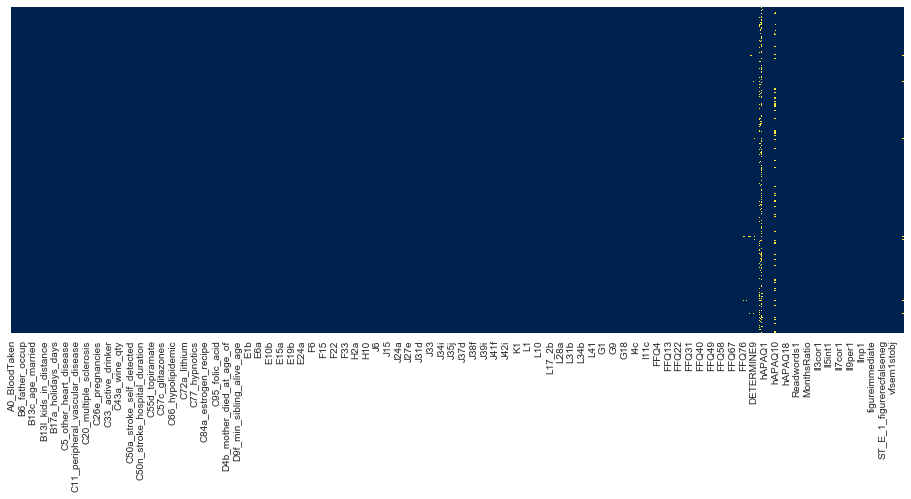

In [276]:
#βλεπω το ποσοστο των null αμεσως μετα τις μετατροπες

print("Number of null values in dataset: ",data.isnull().values.sum()) #αριθμος
print("Percentage: ",(data.isnull().sum().sum()/data.size)*100) #ποσοστο

plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [277]:
#μετατρεπω τα mean σε null 
for column in data:
        data[column] = np.where(np.isclose(data[column].values, data[column].mean()), np.nan, data[column].values)
        
print("Number of null values in dataset: ",data.isnull().values.sum()) #αριθμος
print("Percentage: ",(data.isnull().sum().sum()/data.size)*100) #ποσοστο

Number of null values in dataset:  116209
Percentage:  8.4181603759917


##### υπαρχουν ομως πολλες στηλες με τιμες <0,05 ενω είναι κατηγορικές, και δεν τις πιανει το mean για να γινουν nan, αρα αντικαθιστωνται με συνθηκη

In [278]:
data=data.apply(lambda x: np.where((x >0)&(x<0.08),np.nan,x))

##### αυξηση των ελλιπων τιμων μετα την αντικατασταση των τιμων >0 & <0,05 

Number of null values in dataset:  170039
Percentage:  12.317596504343491


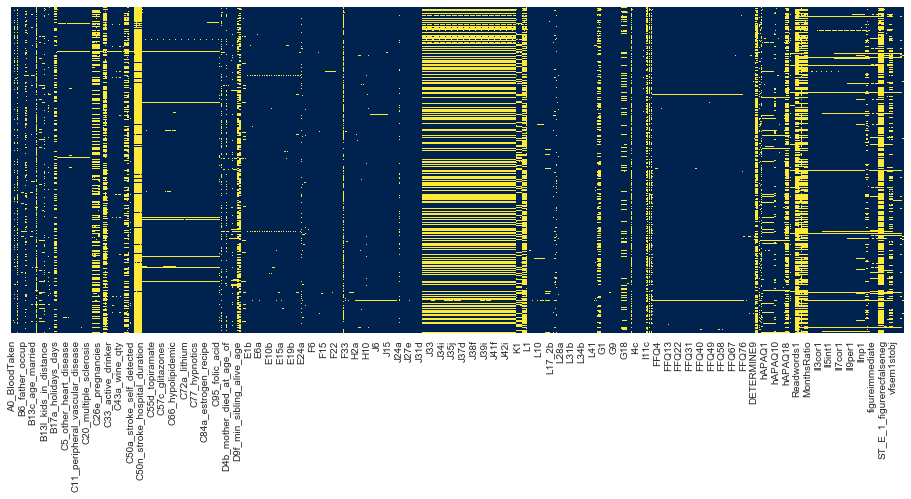

In [279]:
print("Number of null values in dataset: ",data.isnull().values.sum()) #αριθμος
print("Percentage: ",(data.isnull().sum().sum()/data.size)*100) #ποσοστο

plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

##### μετατροπη στηλων προβλεψης (στο τελος αυτες γιατι αφαιρουνται 10 γραμμες κι αλλαζει το mean)

In [280]:
data['G1'].value_counts()
# 0.000  None
# 0.500  Questionable
# 1.000  Mild
# 2.000  Moderate
# 3.000  Severe
# 0.131  nan

0.00    1520
0.50     240
1.00      60
2.00      14
3.00      11
Name: G1, dtype: int64

In [281]:
data['G21'].value_counts()
# 0.000  Normal
# 0.500  MCI
# 1.000  Dementia

0.00    1543
1.00     217
2.00      78
Name: G21, dtype: int64

In [282]:
data['G1']= np.where(np.isclose(data['G1'].values, data['G1'].mean()), np.nan, data['G1'].values)#mean to nan
data['G1'] = data['G1'].replace([0,0.5,1,2,3,4,5],[0,1,2,3,4,5,6])                                

In [283]:
data['G21']= np.where(np.isclose(data['G21'].values, data['G21'].mean()), np.nan, data['G21'].values)#mean to nan                      

In [284]:
print(data['G1'].isnull().values.sum())
print(data['G21'].isnull().values.sum())

3
10


In [285]:
#Οι 3 καταχωρησεις όπου G1=nan εχουν και G21=nan, αρα αφαιρω μόνο τις 10 nan του G21 και καθαρίζουν οι μεταβλητες πρόβλεψης 
data.dropna(subset=['G21'], inplace=True)

In [286]:
print(data.shape)

(1838, 747)


##### μετατροπες με κωδικους  στο excel

In [287]:
process_codes = pd.read_excel('data_xl.xlsx',sheet_name='clmn_names',encoding = "ISO-8859-7")
print(process_codes.shape)
process_codes.head()

(3, 749)


,A0_BloodTaken,A1a_City,A1b_random_sample,A10_age,A11_sex,A30_insurance,A16_witness_self,B1_greek_main_lang,B2_main_occupation,B6_father_occup,...,TMTratio,vfsem1stobj,vfsemobjrelated,vfsemobjcluste,vfsemobjswich,vfsemobjerr,vfsemobjpererr,vfphon1stalphobj,vfpharelated,DETERMINE_TOTAL
0,drop,drop,drop,NaN,ohe,zerovar,zerovar,zerovar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Blood sample,City of examination,Random sample,Age,Gender,Insurance,Person providing the information,Participant's spoken language,Occupation when working,Father's occupation,...,TMT ratio (B: Α),Semantic objects,Semantic objects related words,Semantic objects cluster,Semantic objects switches,Semantic objects error,Semantic objects perseverations,"Phonological letter ""a""","Phonological letter ""a"" related",nan
2,NaN,1=larisa 2=marous,NaN,NaN,1=male 2=female,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [288]:
#αποθηκευω σε λιστα τις στηλες που θελω να κανω drop
drop_list = list(process_codes.columns[(process_codes=='drop').iloc[0]])
print(drop_list,len(drop_list))


['A0_BloodTaken', 'A1a_City', 'A1b_random_sample', 'B13a_married', 'B13c_age_married', 'B13e_widower', 'B13f_widower_years', 'B13g_divorced', 'B13m_num_kids_away', 'B14b_residence_rent', 'B17_summer_holidays', 'B17b_holidays_location', 'B17c_holidays_abroad', 'C30_age_start_smoking', 'C31_age_stop_smoking', 'D1_father_alive', 'D2b_father_died_at_age_of', 'D4_mother_alive', 'D4b_mother_died_at_age_of', 'D5b_siblings_has_history', 'D29_num_children', 'F32', 'K42', 'K43', 'K44', 'hAPAQ7', 'hAPAQ19', 'hAPAQ20', 'Readletters1', 'Readwords1', 'Readingsyllables1', 'Read_matchsentence', 'clockcopy'] 33


C:\Users\redi\Anaconda3\envs\tf\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [289]:
#αποθηκευω σε λιστα τις στηλες οπου το mean πρεπει να γινει 0
tozero_list = list(process_codes.columns[(process_codes=='tozero').iloc[0]])
print(tozero_list,len(tozero_list))

['B17a_holidays_days', 'C29_cigars_daily', 'C32_years_smoker', 'C45_social_drinker_self', 'C46_social_drinker_others', 'C47_drink_alone', 'C48_drink_morning', 'C50i_stroke_sudden', 'C50j_stroke_duration', 'C50n_stroke_hospital_duration', 'FFQ0', 'hAPAQ18'] 12


In [290]:
#αποθηκευω σε λιστα τις στηλες near-zero variance
zerovar_list = list(process_codes.columns[(process_codes=='zerovar').iloc[0]])
print(zerovar_list,len(zerovar_list))

['A30_insurance', 'A16_witness_self', 'B1_greek_main_lang', 'C14_doping', 'C15b_LOC_duration', 'C22_normal_pressure_hydrocephalus', 'D3b_parent_history_other', 'D6b_mother_history_other', 'D5d_siblings_history_b', 'D5e_siblings_history_c', 'D9f_min_sibling_alive_age', 'D9f_max_sibling_alive_age', 'D9a_min_sibling_death_age', 'D9a_max_sibling_death_age', 'D29b_children_has_history', 'D29c_children_history', 'K1', 'K2', 'K4', 'K10', 'K13', 'L46', 'L47', 'L48', 'I4', 'I11d', 'I12'] 27


In [291]:
#αποθηκευω σε λιστα τις στηλες που ειναι ειδικες για το φυλλο gs=gender specific
gs_list = list(process_codes.columns[(process_codes=='gs').iloc[0]])
print(gs_list,len(gs_list))

['C26a_mensturation_start', 'C26b_mensturation_stop', 'C26c_mensturation_duration', 'C26d_mensturation_normal', 'C26e_pregnancies', 'C26g_abortions', 'C26h_abortions_provoked'] 7


In [292]:
#αποθηκευω σε λιστα τις στηλες για one hot encoding
ohe_list = list(process_codes.columns[(process_codes=='ohe').iloc[0]])
print(ohe_list,len(ohe_list))

['A11_sex', 'D3a_parent_history', 'hAPAQ21'] 3


##### fillna οι στηλες tozero (πρεπει να αντικατασταθουν πριν γινουν drop οι στηλες >60% null, γτ πεταει κι αυτες)

In [293]:
data['B17a_holidays_days'].isnull().values.sum()

613

In [294]:
print("Number of null values in dataset: ",data.isnull().values.sum()) #αριθμος
print("Percentage: ",(data.isnull().sum().sum()/data.size)*100) #ποσοστο

Number of null values in dataset:  168541
Percentage:  12.275507543412678


In [295]:
#τμηματικα. στις στηλες που οριζει η λιστα
data[tozero_list] = data[tozero_list].fillna(value=0)

In [296]:
data['B17a_holidays_days'].isnull().values.sum()

0

In [297]:
print("Number of null values in dataset: ",data.isnull().values.sum()) #αριθμος
print("Percentage: ",(data.isnull().sum().sum()/data.size)*100) #ποσοστο

Number of null values in dataset:  155429
Percentage:  11.320508730606138


##### Drop nulls ~60 %

In [298]:
print(data.shape)
befor= data.columns.tolist()

(1838, 747)


In [299]:
#see percentage of nulls per column, making a series
nan_perc = data.isna().mean()*100 
nan_perc.sort_values(ascending=False,inplace=True)
print(nan_perc[:40])

C50k_stroke_recovery        94.12
C50l_stroke_diplopia        92.98
C50o_stroke_treatment       92.76
C50m_stroke_in_hospital     92.49
Read_matchsentence          78.56
Readingsyllables1           78.45
Readwords1                  77.64
Readletters1                77.37
K45                         77.31
ST_E_1_figurerectruepos     76.28
ST_E_1_figurerectrueneg     76.28
ST_E_1_figurerecfalsepos    76.28
ST_E_1_figurerecfalseneg    76.28
figurerecognitionSUM        76.28
clockcopy                   75.14
B13f_widower_years          74.48
C31_age_stop_smoking        71.82
I11d                        67.79
DENTAL_PLATE_FOOD           67.36
hAPAQ20                     67.14
DENTAL_PLATE                65.94
hAPAQ19                     65.89
F32                         64.53
K44                         64.20
K43                         64.15
K42                         64.15
I12                         61.86
I4                          61.75
D9a_max_sibling_death_age   61.70
D9a_min_siblin

In [300]:
# Only drop columns which have at least 40% non-NaNs !!! nan~60%
data=(data.dropna(thresh=int(data.shape[0] * .4), axis=1))

In [301]:
data.shape

(1838, 716)

In [302]:
after= data.columns.tolist()
diff = list(set(befor).difference(after))
sorted(diff, key=str.lower)

['B13f_widower_years',
 'C30_age_start_smoking',
 'C31_age_stop_smoking',
 'C50k_stroke_recovery',
 'C50l_stroke_diplopia',
 'C50m_stroke_in_hospital',
 'C50o_stroke_treatment',
 'clockcopy',
 'D9a_max_sibling_death_age',
 'D9a_min_sibling_death_age',
 'DENTAL_PLATE',
 'DENTAL_PLATE_FOOD',
 'F32',
 'figurerecognitionSUM',
 'hAPAQ19',
 'hAPAQ20',
 'I11d',
 'I12',
 'I4',
 'K42',
 'K43',
 'K44',
 'K45',
 'Read_matchsentence',
 'Readingsyllables1',
 'Readletters1',
 'Readwords1',
 'ST_E_1_figurerecfalseneg',
 'ST_E_1_figurerecfalsepos',
 'ST_E_1_figurerectrueneg',
 'ST_E_1_figurerectruepos']

In [303]:
#drop my lists με if, αν δεν υπάρχουν οσες εχουν αφαιρεθει ηδη
data.drop(list(drop_list),errors = 'ignore',axis=1,inplace=True)
data.drop(list(zerovar_list),errors = 'ignore',axis=1,inplace=True)
data.drop(list(gs_list),errors = 'ignore',axis=1,inplace=True)

In [304]:
data.shape

(1838, 668)

In [305]:
print("Number of null values in dataset: ",data.isnull().values.sum()) #αριθμος
print("Percentage: ",(data.isnull().sum().sum()/data.size)*100) #ποσοστο

Number of null values in dataset:  97121
Percentage:  7.910267604073681


In [306]:
data.to_csv(r'data2_droplists.csv',index=False, float_format='%.2f')#point precision in csv